In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

def generate_synthetic_ev_sales_data():
    dates = pd.date_range(start='2019-01-01', periods=60, freq='M')
    regions = ['North', 'South', 'East', 'West']
    
    data = []
    for region in regions:
        sales = np.random.randint(500, 1500, size=len(dates)) + \
                np.linspace(100, 200, len(dates)).astype(int)
        sales = sales + np.random.normal(0, 100, len(dates)).astype(int)  # add some noise
        for i, date in enumerate(dates):
            data.append([date, region, sales[i]])
    
    df = pd.DataFrame(data, columns=['Date', 'Region', 'Sales'])
    return df

# Generate the data
df = generate_synthetic_ev_sales_data()
df.head()


,Date,Region,Sales
0,2019-01-31,North,650
1,2019-02-28,North,1227
2,2019-03-31,North,1261
3,2019-04-30,North,986
4,2019-05-31,North,789


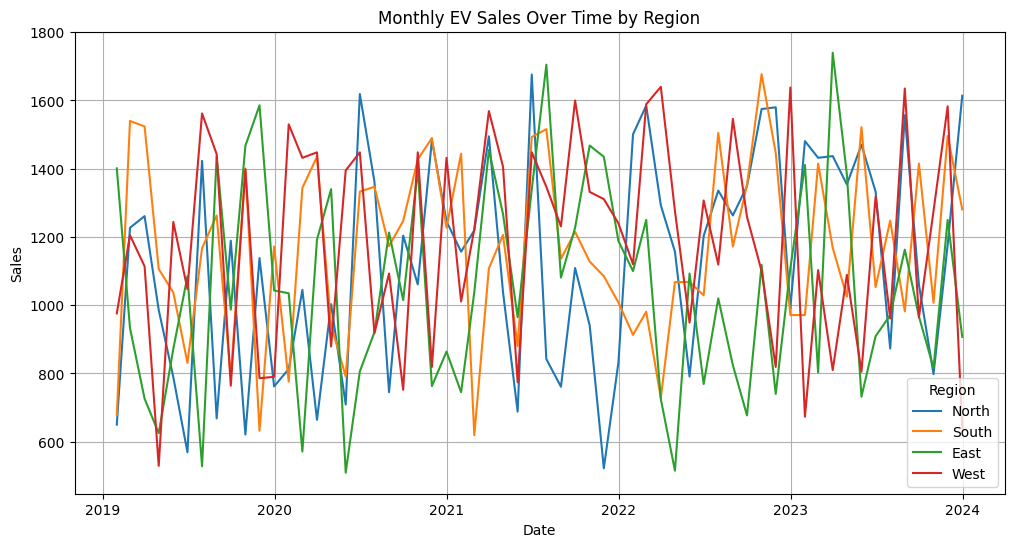

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Sales', hue='Region')
plt.title("Monthly EV Sales Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


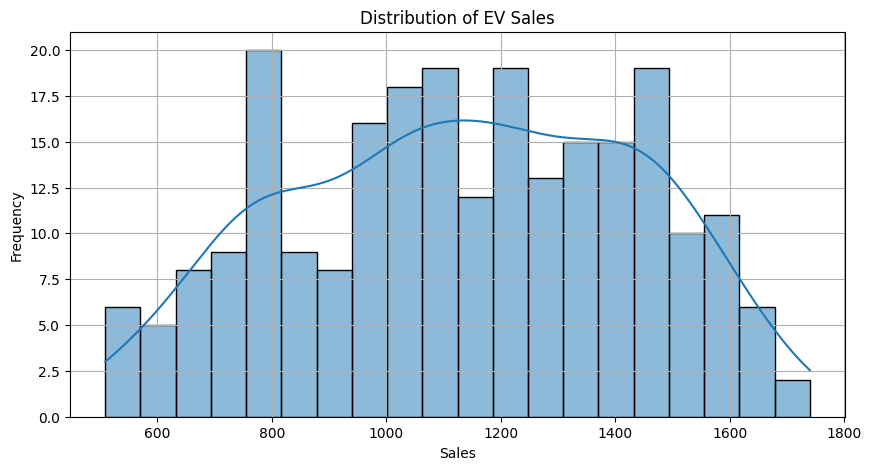

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title("Distribution of EV Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


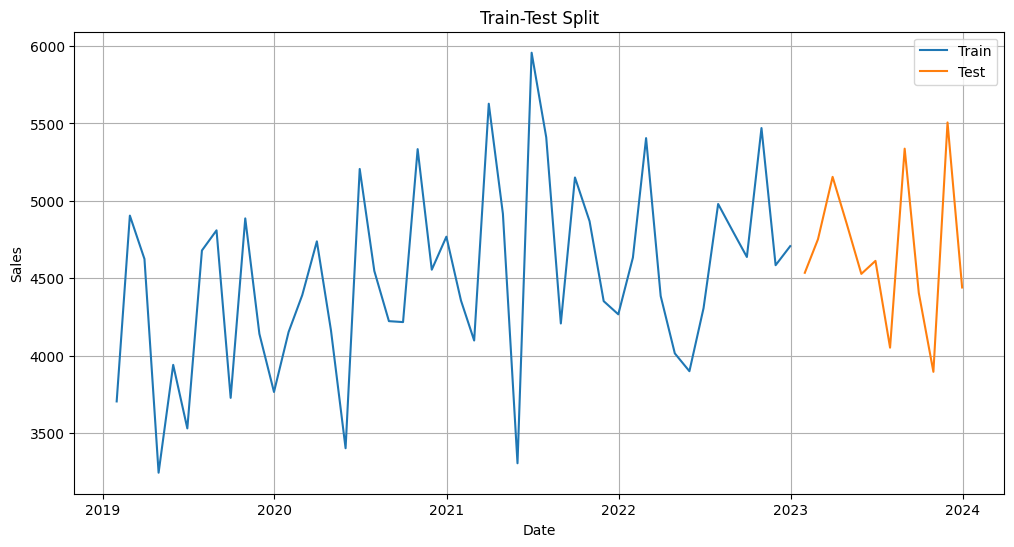

In [8]:
# Aggregate sales data by month
df_monthly = df.groupby('Date')['Sales'].sum().reset_index()

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(df_monthly))
train, test = df_monthly[:train_size], df_monthly[train_size:]

# Plot the train-test split
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Sales'], label='Train')
plt.plot(test['Date'], test['Sales'], label='Test')
plt.title("Train-Test Split")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


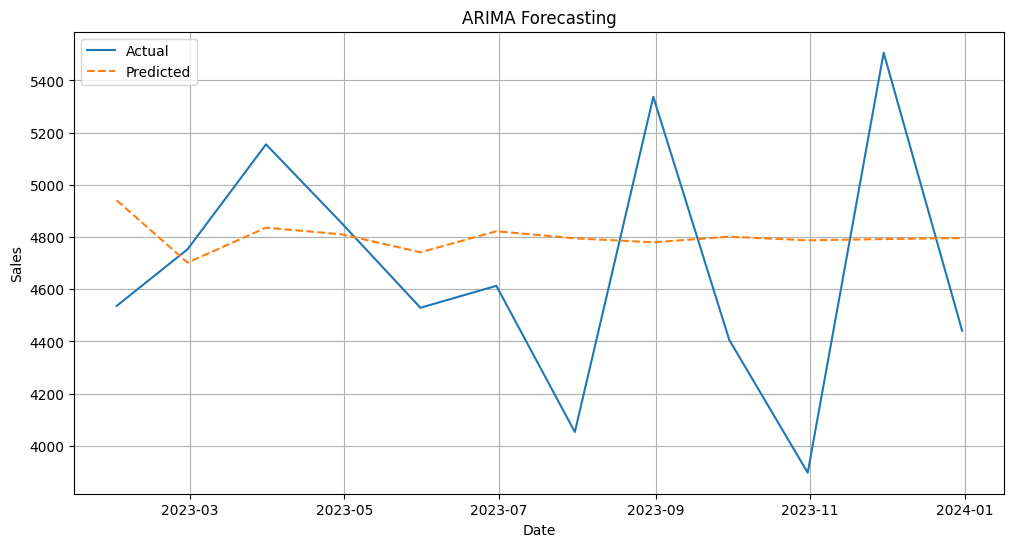

In [9]:
# Fit the ARIMA model
model = ARIMA(train['Sales'], order=(5, 1, 2))  # (p, d, q) values can be tuned
arima_model = model.fit()

# Make predictions
predictions = arima_model.forecast(steps=len(test))

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], test['Sales'], label='Actual')
plt.plot(test['Date'], predictions, label='Predicted', linestyle='--')
plt.title("ARIMA Forecasting")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
mse = mean_squared_error(test['Sales'], predictions)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 233758.71


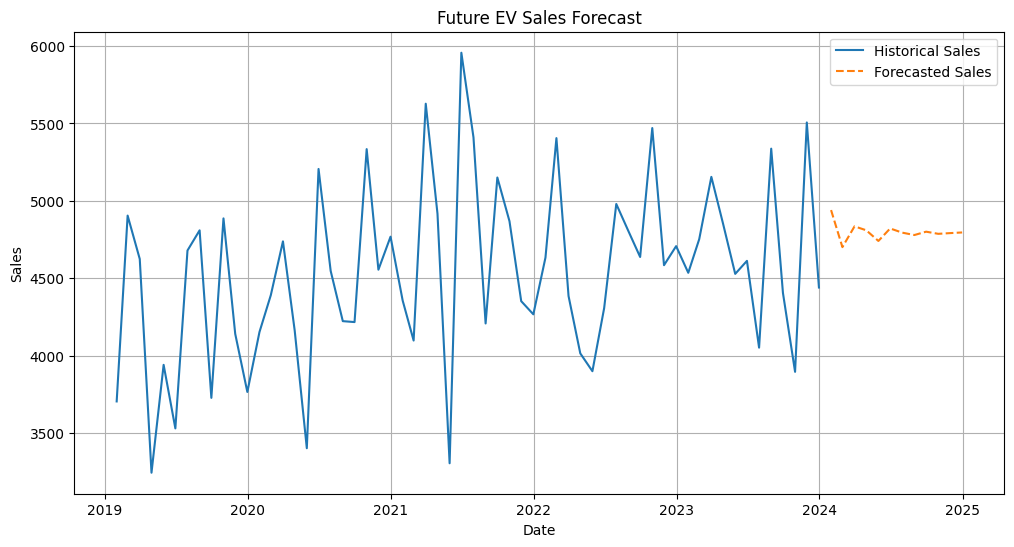

In [11]:
# Forecast future sales for the next 12 months
future_steps = 12
future_dates = pd.date_range(start=df_monthly['Date'].max() + timedelta(days=30), periods=future_steps, freq='M')
future_predictions = arima_model.forecast(steps=future_steps)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Sales': future_predictions})

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Date'], df_monthly['Sales'], label='Historical Sales')
plt.plot(future_df['Date'], future_df['Predicted_Sales'], label='Forecasted Sales', linestyle='--')
plt.title("Future EV Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
